## Обработка датасета

### Датасет с данными уровня счастья по странам

[Перейти на Kaggle](https://www.kaggle.com/datasets/mathurinache/world-happiness-report)

### Распаковка датасета

In [1]:
import pandas as pd

# Укажите путь к вашему файлу
file_path = 'archive/2015.csv'

# Чтение файла CSV в DataFrame
df = pd.read_csv(file_path)

# Вывод первых 5 строк DataFrame для проверки
print(df.head())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

In [2]:
# Вывод последних 5 строк DataFrame для проверки
print(df.tail())

     Country                           Region  Happiness Rank  \
153   Rwanda               Sub-Saharan Africa             154   
154    Benin               Sub-Saharan Africa             155   
155    Syria  Middle East and Northern Africa             156   
156  Burundi               Sub-Saharan Africa             157   
157     Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
153                   0.42864  0.59201                        0.55191   
154         

In [3]:
print(df[df['Country'] == 'Russia'])

   Country                      Region  Happiness Rank  Happiness Score  \
63  Russia  Central and Eastern Europe              64            5.716   

    Standard Error  Economy (GDP per Capita)   Family  \
63         0.03135                   1.13764  1.23617   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
63                   0.66926  0.36679                        0.03005   

    Generosity  Dystopia Residual  
63     0.00199            2.27394  


In [4]:
# Убедимся, что все интересующие нас столбцы существуют
fields = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 
          'Health (Life Expectancy)', 'Freedom', 
          'Trust (Government Corruption)', 'Generosity']

# Проверяем наличие всех столбцов
missing_fields = [field for field in fields if field not in df.columns]

if missing_fields:
    raise ValueError(f"В датафрейме отсутствуют столбцы: {missing_fields}")
else:
    print("Все необходимые столбцы присутствуют в датафрейме.")


Все необходимые столбцы присутствуют в датафрейме.


### Нахождение уникальных идентификаторов расположения стран

In [5]:
# Убедимся, что столбец 'Region' существует
if 'Region' not in df.columns:
    raise ValueError("В датафрейме отсутствует столбец 'Region'")

# Получим уникальные значения из столбца 'Region'
unique_regions = df['Region'].unique()

# Вывод уникальных регионов
print("Уникальные регионы в столбце 'Region':")
print(unique_regions)


Уникальные регионы в столбце 'Region':
['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


### Подсчет стран по регионам

In [6]:
# Подсчитаем количество стран в каждом регионе
region_counts = df['Region'].value_counts()

# Вывод результатов
print("Количество стран в каждом регионе:")
print(region_counts)


Количество стран в каждом регионе:
Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


## Анализ данных

### Расчет корреляций

#### Корреляция Пирсона

In [7]:
import pandas as pd

# Считаем корреляцию Пирсона между 'Happiness Score' и указанными полями
correlations = {}
for field in fields[1:]:  # Пропускаем 'Happiness Score' для итерации
    correlations[field] = df['Happiness Score'].corr(df[field], method='pearson')

# Вывод результатов
for field, corr_value in correlations.items():
    print(f"Корреляция Пирсона между 'Happiness Score' и '{field}': {corr_value:.3f}")


Корреляция Пирсона между 'Happiness Score' и 'Economy (GDP per Capita)': 0.781
Корреляция Пирсона между 'Happiness Score' и 'Family': 0.741
Корреляция Пирсона между 'Happiness Score' и 'Health (Life Expectancy)': 0.724
Корреляция Пирсона между 'Happiness Score' и 'Freedom': 0.568
Корреляция Пирсона между 'Happiness Score' и 'Trust (Government Corruption)': 0.395
Корреляция Пирсона между 'Happiness Score' и 'Generosity': 0.180


#### Корреляция Спирмана

In [8]:
import pandas as pd

# Считаем корреляцию Спирмана между 'Happiness Score' и указанными полями
correlations = {}
for field in fields[1:]:  # Пропускаем 'Happiness Score' для итерации
    correlations[field] = df['Happiness Score'].corr(df[field], method='spearman')

# Вывод результатов
for field, corr_value in correlations.items():
    print(f"Корреляция Спирмана между 'Happiness Score' и '{field}': {corr_value:.3f}")


Корреляция Спирмана между 'Happiness Score' и 'Economy (GDP per Capita)': 0.796
Корреляция Спирмана между 'Happiness Score' и 'Family': 0.770
Корреляция Спирмана между 'Happiness Score' и 'Health (Life Expectancy)': 0.757
Корреляция Спирмана между 'Happiness Score' и 'Freedom': 0.576
Корреляция Спирмана между 'Happiness Score' и 'Trust (Government Corruption)': 0.302
Корреляция Спирмана между 'Happiness Score' и 'Generosity': 0.172


#### Описание результатов

Были посчитаны две разные корреляции, как видно из результатов - они дают разные значения, но примерно в одном диапозоне. Далее будет использоваться корреляция Спирмана, так как она лучше отражает связь между текущими величинами (корреляция Пирсона используется при явных линейных зависимостях, и когда распределение данных близко к нормальному - что не особо подходит для решения данной задачи; в свою очередь корреляция Спирмана работает с рангами величин и для нее не нужны строго линейные данные - она хорошо может работать с нелинейными, также она менее чувствительна к выбросам, что хорошо подходит для данного анализа).

### Анализ различных выборок

#### Составление случайной и статифицированной выборок

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Оригинальный датафрейм для анализа
data = df[fields].dropna()

# Генеральная выборка
population_mean = data['Happiness Score'].mean()

# === Случайная выборка ===
random_sample = data.sample(n=50, random_state=42)  # Выбираем ровно 50 наблюдений случайно
random_mean = random_sample['Happiness Score'].mean()

# Проверка количества строк в случайной выборке
random_sample_count = len(random_sample)

# === Стратифицированная выборка ===
# Ограничиваем данные только интересующими нас регионами
regions_of_interest = ['Western Europe', 'Central and Eastern Europe']
filtered_data = df[df['Region'].isin(regions_of_interest)].copy()

# Добавляем регион как основу для стратификации
stratified_sample = filtered_data.groupby('Region', group_keys=False).apply(
    lambda x: x.sample(frac=1, random_state=42)  # Выбираем все элементы из каждого региона
)

stratified_mean = stratified_sample['Happiness Score'].mean()

# Проверка количества строк в стратифицированной выборке
stratified_sample_count = len(stratified_sample)

# === Доверительные интервалы для среднего ===
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)  # Стандартная ошибка
    z = norm.ppf(1 - (1 - confidence) / 2)  # z-коэффициент
    margin = z * std_err
    return mean - margin, mean + margin

# Доверительные интервалы для генеральной выборки
ci_90_population = confidence_interval(data['Happiness Score'], confidence=0.90)
ci_95_population = confidence_interval(data['Happiness Score'], confidence=0.95)
ci_99_population = confidence_interval(data['Happiness Score'], confidence=0.99)

# Доверительные интервалы для выборок
ci_90_random = confidence_interval(random_sample['Happiness Score'], confidence=0.90)
ci_95_random = confidence_interval(random_sample['Happiness Score'], confidence=0.95)
ci_99_random = confidence_interval(random_sample['Happiness Score'], confidence=0.99)

ci_90_stratified = confidence_interval(stratified_sample['Happiness Score'], confidence=0.90)
ci_95_stratified = confidence_interval(stratified_sample['Happiness Score'], confidence=0.95)
ci_99_stratified = confidence_interval(stratified_sample['Happiness Score'], confidence=0.99)


#### Вывод результатов для разных выборок (общая (генеральная), случайная, статифицированная)

In [10]:
# === Общий вывод результатов ===

# Количество элементов в выборках
print("\nОбщая информация о выборках:")
print(f"Количество элементов в генеральной выборке: {len(data)}")
print(f"Количество элементов в случайной выборке: {random_sample_count}")
print(f"Количество элементов в стратифицированной выборке: {stratified_sample_count}")

# Метрики генеральной выборки
print(f"\nГенеральная выборка:")
print(f"Среднее: {population_mean:.3f}")
print(f"Доверительный интервал (90%): {ci_90_population}")
print(f"Доверительный интервал (95%): {ci_95_population}")
print(f"Доверительный интервал (99%): {ci_99_population}")

# Метрики случайной выборки
print("\nСлучайная выборка:")
print(f"Среднее: {random_mean:.3f}")
print(f"Доверительный интервал (90%): {ci_90_random}")
print(f"Доверительный интервал (95%): {ci_95_random}")
print(f"Доверительный интервал (99%): {ci_99_random}")

# Метрики стратифицированной выборки
print("\nСтратифицированная выборка (Western Europe и Central and Eastern Europe):")
print(f"Среднее: {stratified_mean:.3f}")
print(f"Доверительный интервал (90%): {ci_90_stratified}")
print(f"Доверительный интервал (95%): {ci_95_stratified}")
print(f"Доверительный интервал (99%): {ci_99_stratified}")



Общая информация о выборках:
Количество элементов в генеральной выборке: 158
Количество элементов в случайной выборке: 50
Количество элементов в стратифицированной выборке: 50

Генеральная выборка:
Среднее: 5.376
Доверительный интервал (90%): (5.225900980925299, 5.525567373505078)
Доверительный интервал (95%): (5.197196911889654, 5.554271442540723)
Доверительный интервал (99%): (5.1410964372217585, 5.610371917208619)

Случайная выборка:
Среднее: 5.243
Доверительный интервал (90%): (4.965342353154679, 5.51993764684532)
Доверительный интервал (95%): (4.912219473875842, 5.5730605261241575)
Доверительный интервал (99%): (4.808393819765019, 5.67688618023498)

Стратифицированная выборка (Western Europe и Central and Eastern Europe):
Среднее: 5.903
Доверительный интервал (90%): (5.679500773584738, 6.12597922641526)
Доверительный интервал (95%): (5.636734054825764, 6.1687459451742335)
Доверительный интервал (99%): (5.553148928989167, 6.252331071010831)


#### Описание результатов

Как видно из результатов - самый лучший результат, ожидаемо, показывает стратифицированная выборка (были выбраны страны Европы - где во многих странах очень высокий уровень жизни). В случае с генеральной и случайной выборкой - генеральная показала результаты лучше чем случайная (5.376 против 5.243). Это могло произойти из-за того, что количество объектов (стран) не достаточно большое, и также, учитывая, что среди них есть много африканских, ближневосточных и латиноамериканских стран (с низким уровнем жизни). Получается, что при формировании случайной выборки велика вероятность включения в выборку непропорционально большого числа стран с низким уровнем счастья, что смещает средний показатель вниз. Генеральная выборка, напротив, отражает всю совокупность данных и включает больше стран с высоким уровнем счастья, что делает её среднее значение выше. 

## Кластерный анализ

### Схемы рассеивания

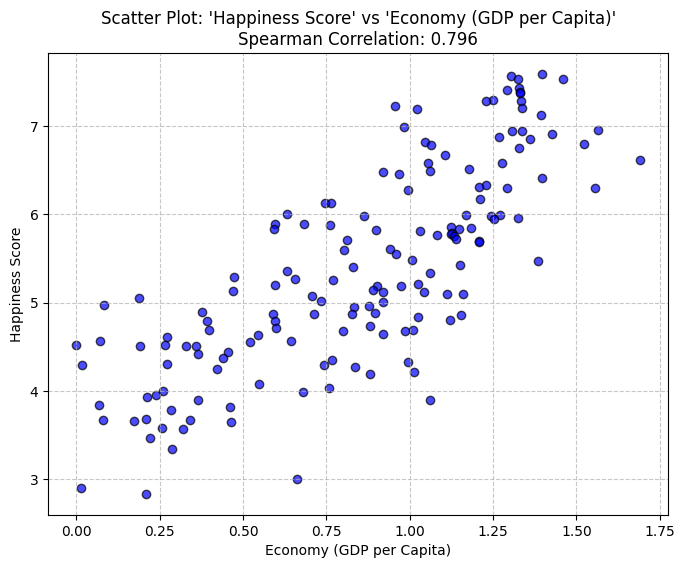

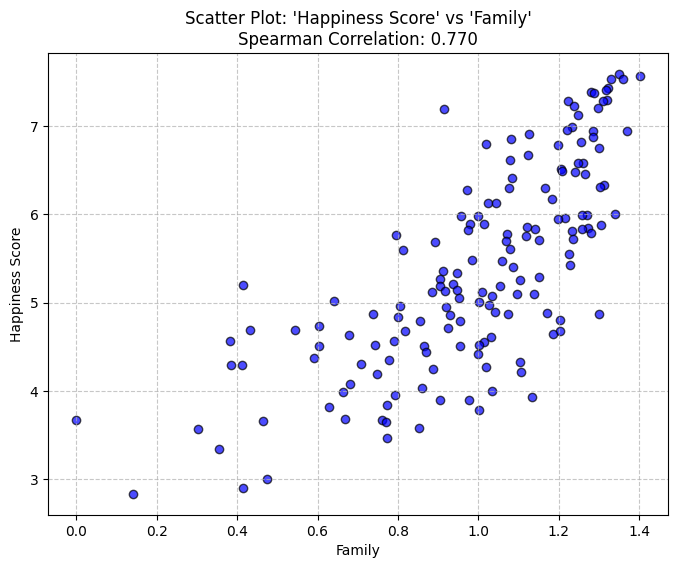

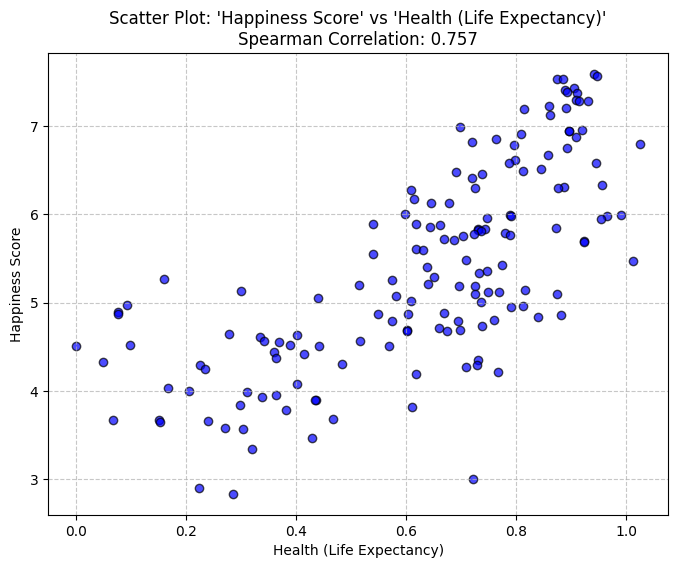

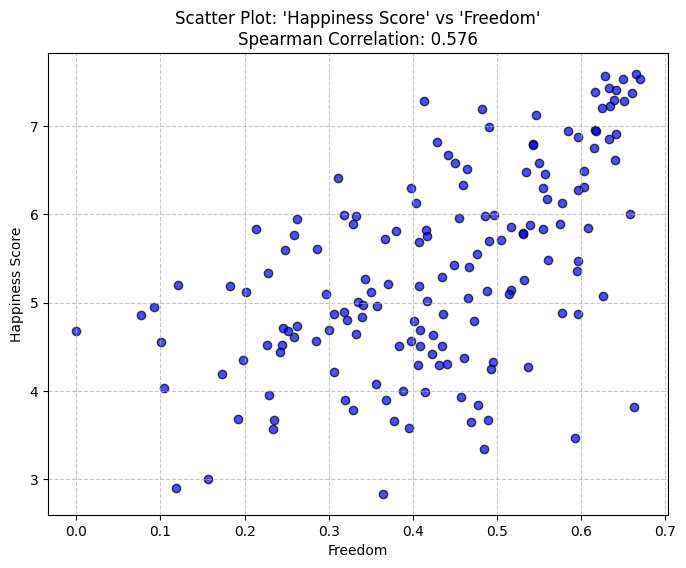

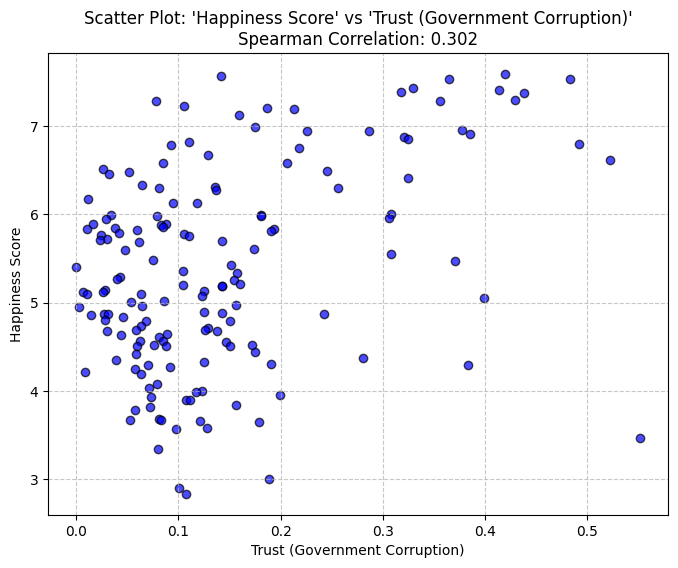

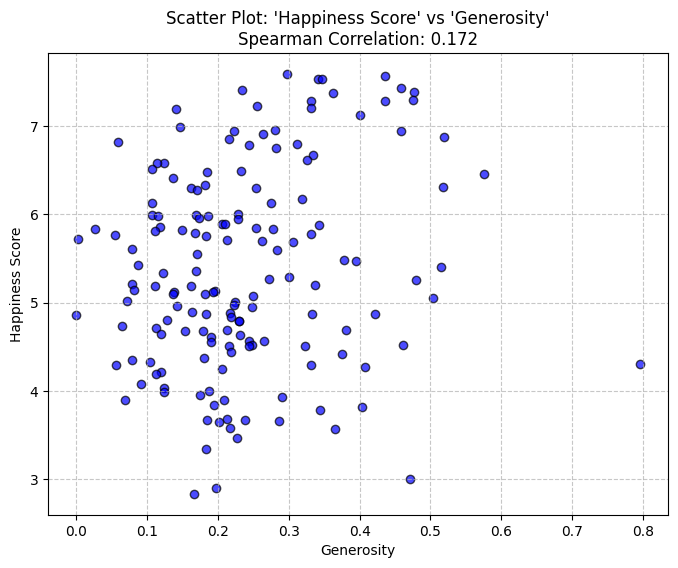

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Построение гистограмм рассеивания
for field in fields[1:]:  # Пропускаем 'Happiness Score' для итерации
    plt.figure(figsize=(8, 6))
    plt.scatter(df[field], df['Happiness Score'], alpha=0.7, color='blue', edgecolor='k')
    plt.title(f"Scatter Plot: 'Happiness Score' vs '{field}'\nSpearman Correlation: {correlations[field]:.3f}")
    plt.xlabel(field)
    plt.ylabel('Happiness Score')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


### Нахождение оптимального числа кластеров (силуэтный метод)

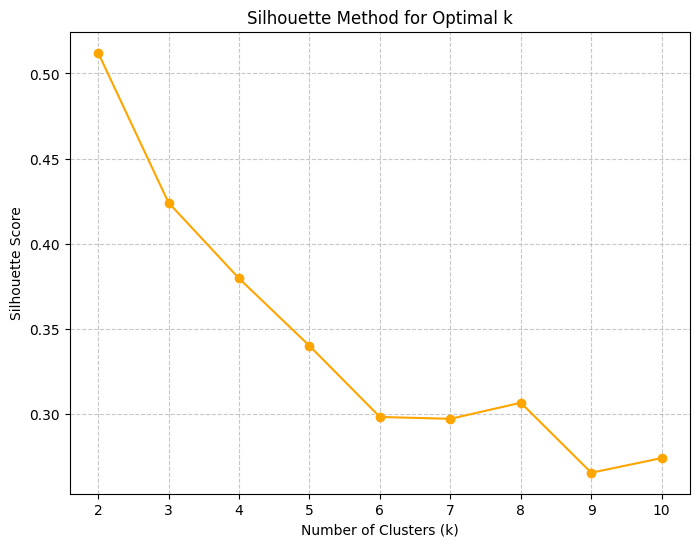

Оптимальное количество кластеров по силуэтному методу: 2


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Подготовка данных для кластеризации (все интересующие поля)
data = df[fields].dropna()  # Убираем пропуски, если есть

# Метод силуэтного коэффициента
silhouette_scores = []
k_range = range(2, 11)  # Проверяем количество кластеров от 2 до 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)  # Оценка силуэта
    silhouette_scores.append(score)

# Построение графика силуэтного метода
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Определение оптимального k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Оптимальное количество кластеров по силуэтному методу: {optimal_k}")


### Кластеризация K-means

#### Кластеризация

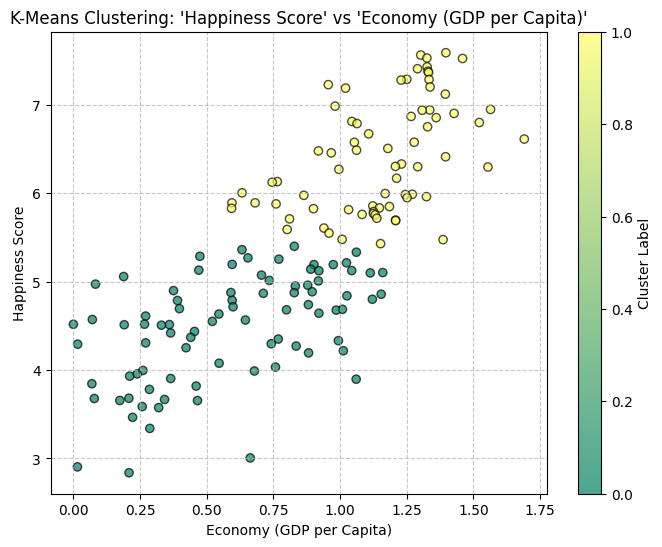

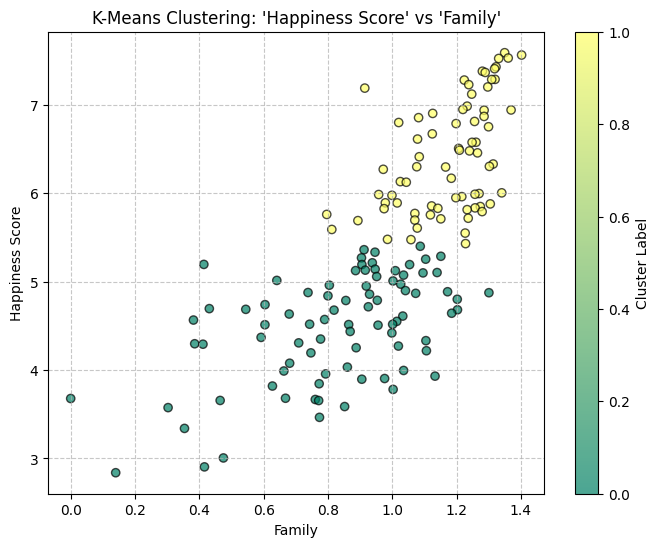

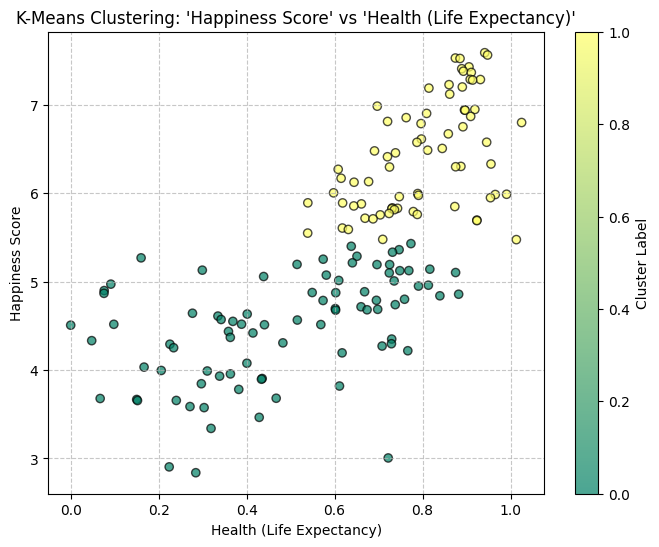

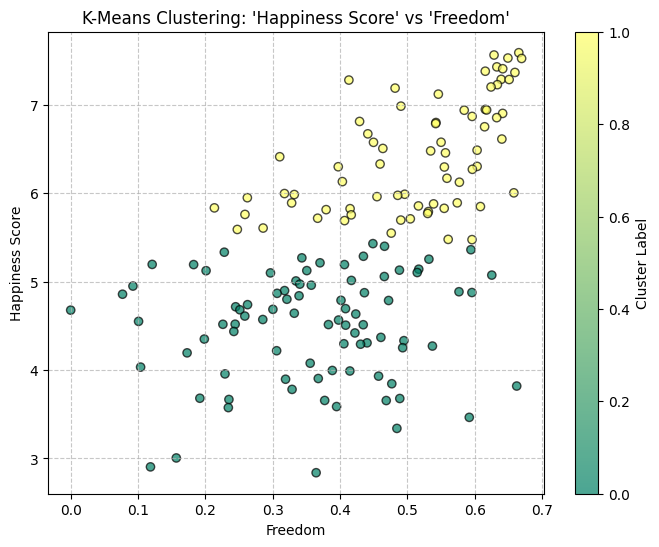

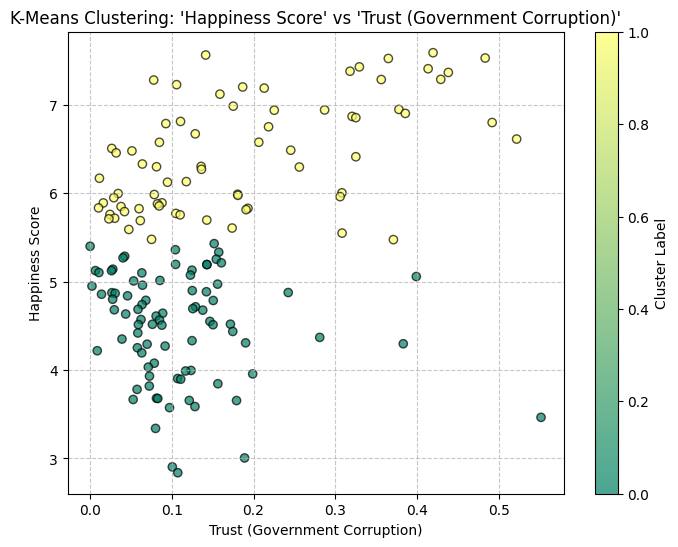

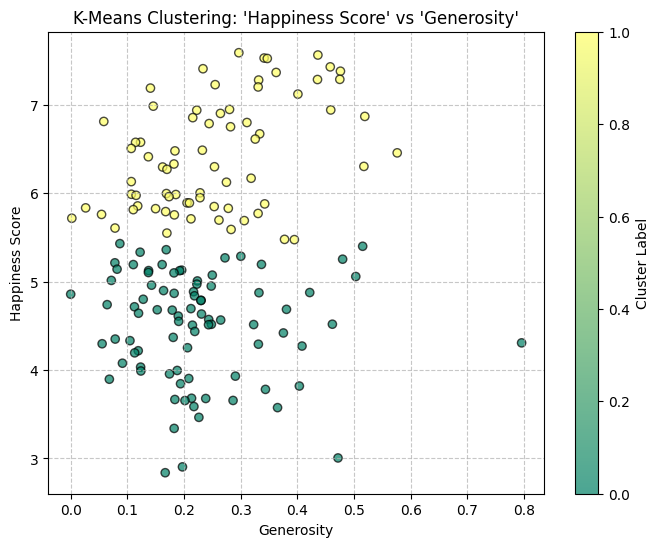

In [13]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Применение кластеризации K-Means и визуализация
for field in fields[1:]:  # Пропускаем 'Happiness Score' для итерации
    x = df[field].values.reshape(-1, 1)
    y = df['Happiness Score'].values.reshape(-1, 1)
    data = np.hstack((x, y))
    
    # Применяем K-Means кластеризацию
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    kmeans.fit(data)
    labels = kmeans.labels_
    
    # Переопределение меток кластеров для соответствия ожиданиям
    if np.mean(df['Happiness Score'][labels == 0]) > np.mean(df['Happiness Score'][labels == 1]):
        labels = np.where(labels == 0, 1, 0)
    
    # Сохранение меток кластеров в DataFrame
    df[f'Cluster_{field}'] = labels
    
    # Визуализация кластеров
    plt.figure(figsize=(8, 6))
    plt.scatter(df[field], df['Happiness Score'], c=labels, cmap='summer', alpha=0.7, edgecolor='k')
    plt.title(f"K-Means Clustering: 'Happiness Score' vs '{field}'")
    plt.xlabel(field)
    plt.ylabel('Happiness Score')
    plt.colorbar(label='Cluster Label')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


#### Вывод групп кластеров для каждой связи

In [14]:
# Вывод данных по каждому кластеру для каждого поля
for field in fields[1:]:  # Пропускаем 'Happiness Score'
    cluster_column = f'Cluster_{field}'
    
    if cluster_column not in df.columns:
        print(f"Колонка '{cluster_column}' отсутствует. Пропуск...")
        continue
    
    print(f"\nКластеры для зависимости 'Happiness Score' и '{field}':")
    for cluster_id in df[cluster_column].unique():  # Для каждого уникального кластера
        cluster_data = df[df[cluster_column] == cluster_id]
        print(f"\nКластер {cluster_id} (по '{field}'): {len(cluster_data)} объектов")
        print(cluster_data[['Country', 'Happiness Score', field]])




Кластеры для зависимости 'Happiness Score' и 'Economy (GDP per Capita)':

Кластер 1 (по 'Economy (GDP per Capita)'): 73 объектов
         Country  Happiness Score  Economy (GDP per Capita)
0    Switzerland            7.587                   1.39651
1        Iceland            7.561                   1.30232
2        Denmark            7.527                   1.32548
3         Norway            7.522                   1.45900
4         Canada            7.427                   1.32629
..           ...              ...                       ...
68        Kosovo            5.589                   0.80148
69  Turkmenistan            5.548                   0.95847
70     Mauritius            5.477                   1.00761
71     Hong Kong            5.474                   1.38604
72       Estonia            5.429                   1.15174

[73 rows x 3 columns]

Кластер 0 (по 'Economy (GDP per Capita)'): 85 объектов
        Country  Happiness Score  Economy (GDP per Capita)
73    Indone

#### Описание результатов

Методом K-means выборка была разбита на два кластера (оптимальное количество кластеров было определено с помощью силуэтного метода). Однако, в данной задаче, из-за высокой однородности данных (отсутствия четко выраженных групп объектов), кластеры сформировались просто на основе уровня счастья - страны с уровнем счастья выше среднего и ниже среднего. Этот результат был очевиден и без применения кластеризации, что делает использование метода K-means в данном случае малоинформативным и практически бесполезным для анализа.

### Кластеризация методом DBSCAN

#### Масштабирование данных

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Подготовка данных для масштабирования
data = df[fields].values  # Извлекаем значения всех полей
scaler = StandardScaler()  # Создаем объект StandardScaler
data_scaled = scaler.fit_transform(data)  # Масштабируем данные (каждое поле: среднее 0, стандартное отклонение 1)

#### Кластеризация

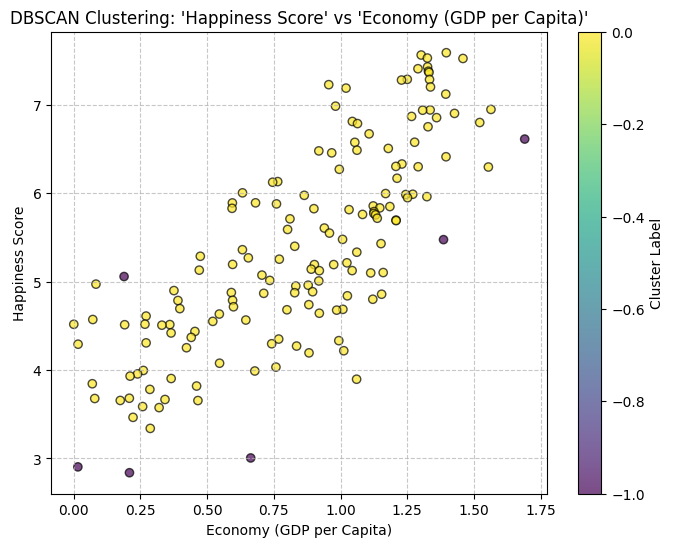

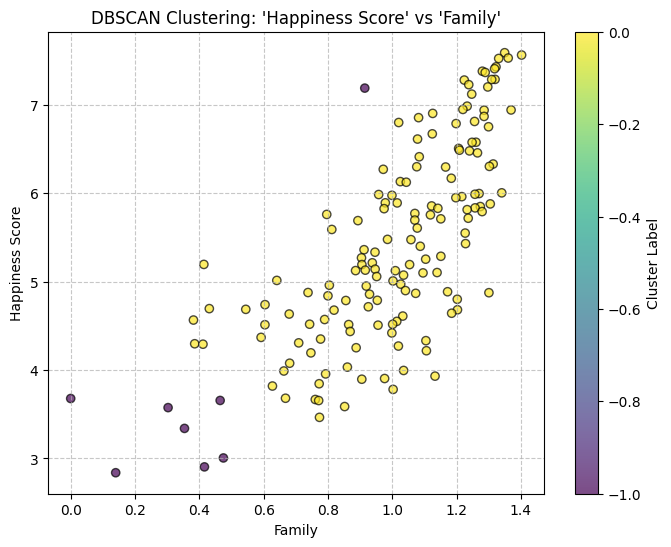

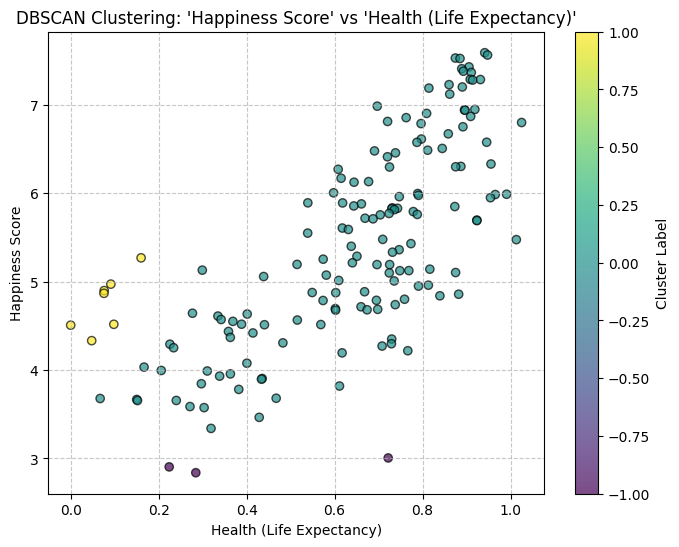

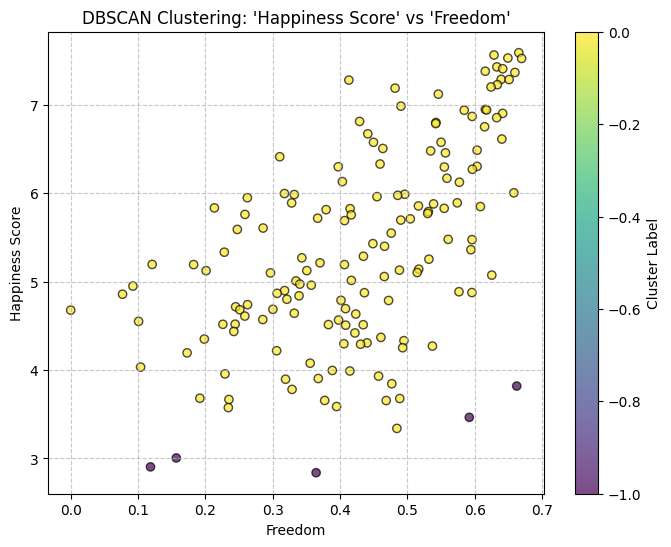

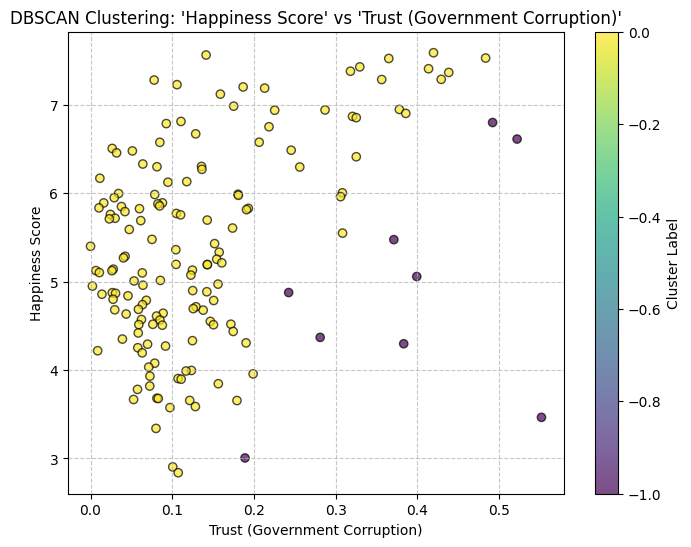

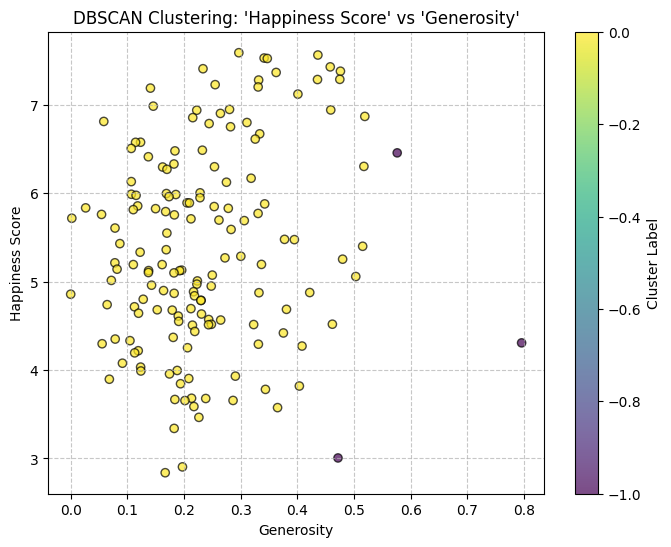

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Словарь для хранения меток кластеров
labels_dict = {}

# Применение кластеризации DBSCAN и визуализация
for field in fields[1:]:  # Пропускаем 'Happiness Score' для итерации
    # Подготовка данных для анализа (пара 'Happiness Score' и текущий field)
    x = df[field].values.reshape(-1, 1)
    y = df['Happiness Score'].values.reshape(-1, 1)
    data = np.hstack((x, y))  # Объединяем в одну матрицу (2D)
    
    # Масштабирование данных (DBSCAN чувствителен к масштабу данных)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Автоматический расчет eps с помощью k-distance plot
    neighbors = NearestNeighbors(n_neighbors=5)
    neighbors_fit = neighbors.fit(data_scaled)
    distances, _ = neighbors_fit.kneighbors(data_scaled)
    distances = np.sort(distances[:, 4])  # 4-й сосед
    optimal_eps = np.percentile(distances, 90)  # Берем 90-й перцентиль как пример
    
    # Применяем DBSCAN
    dbscan = DBSCAN(eps=optimal_eps, min_samples=4)  # min_samples можно варьировать
    labels = dbscan.fit_predict(data_scaled)
    
    # Сохраняем метки кластеров
    labels_dict[field] = labels
    df[f'Cluster_{field}'] = labels  # Добавляем в датафрейм для дальнейшего анализа

    # Проверяем, есть ли более одного кластера
    unique_labels = np.unique(labels)
    if len(unique_labels) <= 1:  # Если все точки попали в один кластер или шум
        print(f"Для поля {field} кластеризация неэффективна (все точки в одном кластере или шум).")
        continue  # Пропускаем визуализацию
    
    # Визуализация кластеров
    plt.figure(figsize=(8, 6))
    plt.scatter(df[field], df['Happiness Score'], c=labels, cmap='viridis', alpha=0.7, edgecolor='k')
    plt.title(f"DBSCAN Clustering: 'Happiness Score' vs '{field}'")
    plt.xlabel(field)
    plt.ylabel('Happiness Score')
    plt.colorbar(label='Cluster Label')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


#### Визуализация выбросов для каждой связи

In [17]:
# Словарь для хранения выбросов
outliers_dict = {}

print("=" * 50)
# Обработка выбросов для каждого признака
for field, labels in labels_dict.items():
    # Определяем выбросы (метки кластеров -1)
    outliers = df[labels == -1][['Country', 'Happiness Score', field]]
    outliers_dict[field] = outliers  # Сохраняем выбросы в словарь
    
    # Вывод выбросов и их количества
    print(f"Выбросы для '{field}' (всего выбросов: {len(outliers)}):")
    print(outliers)
    print("=" * 50)


Выбросы для 'Economy (GDP per Capita)' (всего выбросов: 6):
               Country  Happiness Score  Economy (GDP per Capita)
27               Qatar            6.611                   1.69042
71           Hong Kong            5.474                   1.38604
90   Somaliland region            5.057                   0.18847
155              Syria            3.006                   0.66320
156            Burundi            2.905                   0.01530
157               Togo            2.839                   0.20868
Выбросы для 'Family' (всего выбросов: 8):
                      Country  Happiness Score   Family
13                     Mexico            7.187  0.91451
147  Central African Republic            3.678  0.00000
149                    Guinea            3.656  0.46475
152               Afghanistan            3.575  0.30285
154                     Benin            3.340  0.35386
155                     Syria            3.006  0.47489
156                   Burundi            2.9

#### Вывод маленького кластера для связи 'Health (Life Expectancy)'

In [18]:
# Обработка маленького кластера для связи 'Health (Life Expectancy)'
field = 'Health (Life Expectancy)'

# Получаем метки кластеров для данного признака
labels = labels_dict[field]

# Находим уникальные кластеры, исключая шум (-1)
unique_clusters = [label for label in np.unique(labels) if label != -1]

# Если кластеров больше одного, ищем маленький кластер
if len(unique_clusters) > 1:
    # Считаем количество точек в каждом кластере
    cluster_sizes = {cluster: (labels == cluster).sum() for cluster in unique_clusters}
    # Определяем маленький кластер (наименьший размер)
    smallest_cluster = min(cluster_sizes, key=cluster_sizes.get)
    
    # Выбираем элементы маленького кластера
    small_cluster_elements = df[labels == smallest_cluster][['Country', 'Happiness Score', field]]
    
    # Вывод результатов
    print(f"Элементы маленького кластера '{field}' (всего элементов: {cluster_sizes[smallest_cluster]}):")
    print(small_cluster_elements)
else:
    print(f"Для '{field}' нет достаточного количества кластеров для выделения маленького кластера.")


Элементы маленького кластера 'Health (Life Expectancy)' (всего элементов: 7):
              Country  Happiness Score  Health (Life Expectancy)
77            Nigeria            5.268                   0.16007
93         Mozambique            4.971                   0.09131
96            Lesotho            4.898                   0.07612
100         Swaziland            4.867                   0.07566
119  Congo (Kinshasa)            4.517                   0.09806
122      Sierra Leone            4.507                   0.00000
127          Botswana            4.332                   0.04776


#### Описание результатов

Метод кластеризации DBSCAN позволяет хорошо определять аномалии (одиночные кластеры или их маленькие группы) — ему, в отличие от K-means, не нужно знать количество кластеров заранее, так как он определяет их самостоятельно на основе плотности распределения данных. В данном случае можно увидеть интересные выбросы, представляющие страны, которые не вписываются в общую картину. 

##### ВВП на душу населения

В данной категории, есть такие страны как Катар (страна с очень маленьким населением - только 10 процентов населения это сами катарцы, остальные это рабочие с Ближнего Востока и Азии, в ней недавно было найдено много полезных ископаемых, и сейчас идет активная модернизация страны - строятся большие и сложные, перспективные в будущем, объекты, которые требуют привлечения большого количества инвестиций (недавно в Катаре проводился чемпионат мира по футболу, для которого было построенно множество дорогих и огромных объектов) - соотвественно отсюда и такой огроменный показатель ВВП на душу населения, хотя счастье остается на уровне немного выше чем в среднем); Гонконг (примерно аналогичная ситуация как в Катаре - правда по другим причинам, этот город является важным транспортным узлом, и через него идет активная торговля, отсюда и высокий ВВП на душу населения - учитывая что в расчет этого показателя идет население всего только одного города); Сомалиленд - часть государства Сомали (очень низкое ВВП на душу населения - однако, так как там развито пиратство и в целом у людей есть способы "весело" проводить время - уровень счастья непропорционально высок); Сирия (неплохой показатель ВВП на душу населения, однако учитывая очень напряженную внутреннюю и внешнюю политическую ситуацию, уровень счастья непропорционально низок); что же касается Бурунди и Того - это самые бедные страны Африки (учитывая, что в Африке уровень жизни сам по себе низкий - в данном случае получается еще более удручающая картина).

##### Семья

В данном случае - тут есть Мексика (в стране показатель семьи умеренный - немного выше, чем в среднем, однако уровень счастья крайне высок - это может быть связано с некоторыми факторами - у них солнечно, всегда тепло, также под боком есть очень богатый и могущественный сосед - США, с которым налажена торговля - в целом довольно открытая, дружелюбная культура, которая свойственна многим странам Южной и Центральной Америки); далее у нас идет целый набор африканских стран - Центральноафриканская Республика (ЦАР), Бурунди, Того, Бенин, Гвинея - это все крайне бедные страны Африки, где в семьях по очень много детей (эти страны еще не прошли демографический переход), отсюда сильные непропориональные значения счастья и семьи; также еще есть Сирия и Афганистан (мусульманские страны с крайне нестабильной политической обстановкой в них - также много детей в семьях, из-за религиозных соображений в частности, поэтому опять же получаются непропориональные значения семьи и счастья).

##### Ожидаемая продолжительность жизни

Здесь присутсвуют все те же знакомые страны - Сирия (довольно хорошая продолжительность жизни, однако обостренная политическая обстановка никуда не делась); Бурунди и Того тут все понятно - беднейшие страны Африки; примечательным здесь является то, что в данном случае метод DBSCAN выделил схожие по характеристикам страны в отдельный кластер - это Мозамбик, Лесото, королевство Свазиленд, Конго, Сьерра-Леоне и Ботствана, также страны Африки, в которых уровень счастья не так низок, как к примеру в Бурунди и Того (немного более благоприятная политическая и экономическая обстановка), однако высокая преступность, отсутствие современных технологий и развитых институтов образования и здравоохранения никуда не делись - поэтому ожидаемая продолжительность жизни остается крайне низкой.

##### Свобода

В данной категории наблюдаются следующие страны - Того, Бурунди и Сирия, уже проанализированы и понятно почему они тут; из новых стран это еще одна африканска страна - Руанда (во многих странах Африки установлены диктатуры и индекс свободы низкий, однако есть ряд стран, в том числе и Руанда, где нету жесткой диктатуры и некая свобода присутствует - в ее номинальном значении, однако отсутствие развитых институтов здравоохранения, образования и повсеместная бедность - дают о себе знать, поэтому индекс счастья очень низкий); Камбоджа (страна в Юго-Восточной Азии, которая пережила один из самых кровавых режимов в истории человечества - режим "красных кхмеров", который уничтожил абсолютно все социальные и экономические институты (включая массовый геноцид людей), и вогнал страну в глубокую политическую и социальную дезинтеграцию (посттравматический синдромом на уровне всей страны), из которого она не может выбраться до сих пор, и пусть сейчас диктатуры в явном виде нету и у людей есть возможность принимать самостоятельно многие решения, все равно последствия прошлого остались, и уровень счастья в данной стране очень низкий).

##### Доверие государству (индекс коррупции)

В данном случае, здесь присутствуют самые уникальные и неочевидные страны: Сингапур (эта страна известна, как одна из наименее коррумпированных в мире, потому что в свое время в стране ввели жесткие законы и правила, касательно коррупции (после получения независимости от Британской Империи, она была одной из самых коррумпированных стран - и с этим правительство Сингапура решило решительно и бескомпромиссно бороться), поэтому индекс доверия здесь крайне высок - непропорционально относительно уровня счастья (счастье находится на хорошем уровне, однако индекс доверия бьет все рекорды)); Катар (аналогичная ситуация как в Сингапуре); Гонконг (аналогичная ситуация как в Сингапуре и Катаре, только в меньших масштабах); что же касается остальных стран - Сомалиленда, Лаоса, Джибути, Грузии, Руанды и Сирии - все эти страны никак не вписываются в реальное положение дел, почему-то у них у всех, особенно на фоне подавляющего числа других стран - высокий индекс доверия, хотя в реальности - экономики этих стран, никак нельзя назвать эффективными и некоррумпированными, поэтому можно предположить, что это связано с достаточно расплывчатым понятием самого термина - доверие к государству, оно достаточно субъективное и его сложно численно оценить, поэтому наблюдаются абсолютно феноменальные числа доверия для сильно или умеренно коррумпированных стран со слабо развитым экономическим сектором. Также исходя из довольно невысокого коэффициента корреляции, который был посчитан до этого (корреляция Спирмана между 'Happiness Score' и 'Trust (Government Corruption)': 0.302), можно сделать вывод, что, действительно, индекс доверия достаточно малоинформативный сам по себе и его сложно как-то оценить и точно посчитать из-за самой природы доверия (слишком субъективный параметр). 

##### Щедрость

Здесь присутствуют две страны из Юго-Восточной Азии - первая Таиланд (в случае Таиланда значения совсем немного выбиваются из общей картины - соотношение уровня счастья к щедрости немногим ниже, чем в большинстве других стран, объяснить это можно исходя из культуры страны - это буддисткая страна с высоким уровнем коллективизма, где помощь окружающим является основой функционирования общества, отсюда и такие высокие показатели щедрости); вторая это Мьянма (в данном случае общая причина, такая же как и в Таиланде - крайне буддисткая страна с очень высоким уровнем коллективизма, однако так как в стране не такая благоприятная политическая и экономическая обстановка, как в ее соседе (Таиланд и Мьянма граничат друг с другом), отсюда вытекает существенно перекошенное соотношение щедрости к счастью); также тут снова присутствует Сирия, которая уже была проанализирована ранее.

## Регрессионый анализ

### Коэффициент VIF

In [19]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Масштабируем данные
scaler = StandardScaler()
X_scaled_raw = df[fields[1:]].dropna()  # Отбираем данные для масштабирования
X_scaled = scaler.fit_transform(X_scaled_raw)  # Масштабируем данные

# Рассчитаем VIF для масштабированных данных X_scaled
vif_data = pd.DataFrame()
vif_data["Feature"] = fields[1:]  # Имена признаков
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Выводим результаты
print("\nПоказатели VIF для признаков:")
print(vif_data)



Показатели VIF для признаков:
                         Feature       VIF
0       Economy (GDP per Capita)  4.078140
1                         Family  1.901853
2       Health (Life Expectancy)  3.157655
3                        Freedom  1.740443
4  Trust (Government Corruption)  1.419584
5                     Generosity  1.268610


### Линейная регрессия

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Отбираем данные
data_unscaled = df[fields].dropna()

# Разделяем целевую переменную и предикторы
X_unscaled = data_unscaled[fields[1:]]  # Независимые переменные (признаки)
y_unscaled = data_unscaled['Happiness Score']  # Целевая переменная (счастье)

# Разделяем данные на обучающую и тестовую выборки
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(
    X_unscaled, y_unscaled, test_size=0.2, random_state=42)

# Обучаем модель линейной регрессии
model_unscaled = LinearRegression()
model_unscaled.fit(X_train_unscaled, y_train_unscaled)

# Предсказываем на тестовых данных
y_pred_unscaled = model_unscaled.predict(X_test_unscaled)

# Оцениваем качество модели
r2_unscaled = r2_score(y_test_unscaled, y_pred_unscaled)
mse_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)
mae_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
rmse_unscaled = np.sqrt(mse_unscaled)

# Выводим только метрики качества
print(f"R^2 (без масштабирования): {r2_unscaled:.3f}")
print(f"MSE (без масштабирования): {mse_unscaled:.3f}")
print(f"MAE (без масштабирования): {mae_unscaled:.3f}")
print(f"RMSE (без масштабирования): {rmse_unscaled:.3f}")

# Выводим коэффициенты регрессии
coefficients_unscaled = pd.DataFrame({'Feature': fields[1:], 'Coefficient': model_unscaled.coef_})
coefficients_unscaled = coefficients_unscaled.sort_values(by='Coefficient', ascending=False)
print("\nВлияние признаков на счастье (коэффициенты модели, без масштабирования):")
print(coefficients_unscaled)


R^2 (без масштабирования): 0.829
MSE (без масштабирования): 0.242
MAE (без масштабирования): 0.402
RMSE (без масштабирования): 0.492

Влияние признаков на счастье (коэффициенты модели, без масштабирования):
                         Feature  Coefficient
1                         Family     1.261558
3                        Freedom     1.231449
2       Health (Life Expectancy)     1.019769
0       Economy (GDP per Capita)     0.876149
4  Trust (Government Corruption)     0.811955
5                     Generosity     0.635959


### Масштабированные признаки

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Отбираем данные
data_scaled = df[fields].dropna()

# Разделяем целевую переменную и предикторы
X_scaled_raw = data_scaled[fields[1:]]  # Независимые переменные (признаки)
y_scaled = data_scaled['Happiness Score']  # Целевая переменная (счастье)

# Масштабируем данные с помощью StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled_raw)

# Разделяем данные на обучающую и тестовую выборки
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42)

# Обучаем модель линейной регрессии
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)

# Предсказываем на тестовых данных
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Оцениваем качество модели
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

# Вычисляем MAPE (средняя абсолютная процентная ошибка)
mape_scaled = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100

# Выводим только метрики качества
print(f"R^2 (с масштабированием): {r2_scaled:.3f}")
print(f"MSE (с масштабированием): {mse_scaled:.3f}")
print(f"MAE (с масштабированием): {mae_scaled:.3f}")
print(f"RMSE (с масштабированием): {rmse_scaled:.3f}")
print(f"MAPE (с масштабированием): {mape_scaled:.3f}%")

# Выводим коэффициенты регрессии
coefficients_scaled = pd.DataFrame({'Feature': fields[1:], 'Coefficient': model_scaled.coef_})
coefficients_scaled = coefficients_scaled.sort_values(by='Coefficient', ascending=False)
print("\nВлияние признаков на счастье (коэффициенты модели, с масштабированием):")
print(coefficients_scaled)


R^2 (с масштабированием): 0.829
MSE (с масштабированием): 0.242
MAE (с масштабированием): 0.402
RMSE (с масштабированием): 0.492
MAPE (с масштабированием): 7.829%

Влияние признаков на счастье (коэффициенты модели, с масштабированием):
                         Feature  Coefficient
0       Economy (GDP per Capita)     0.352074
1                         Family     0.342520
2       Health (Life Expectancy)     0.251164
3                        Freedom     0.184982
4  Trust (Government Corruption)     0.097153
5                     Generosity     0.080311


### Описание результатов

Сначала просто была посчитана линейная регрессия (перед этим была сделана проверка данных на мультиколлинеарность с помощью коэффициента VIF - который показал, что данные коррелируют между собой в пределах допустимого (все коэффициенты VIF ниже 5) - это значит что признаки не создают значимого перекрытия данных, и модель сможет качественно оценить влияние каждого из них на целевую переменную (уровень счастья), обеспечивая точные и надежные расчеты) - однако из-за разного масштаба данных, итоговые коэффициенты при разных признаках не несут какой-то однозначной информации об их меньшем или большем влиянии на модель, поэтому нужно их промасштабировать и посчитать линейную регрессию уже с масштабированными признаками. Из результатов видно, что наибольшее влияние на индекс счастья оказывает ВВП на душу населения и семья (социальные связи) - 0.352074 и 0.342520; ожидаемая продолжительность жизни также существенно влияет на оценку (0.251164); влияние свободы ощущается, но уже не так сильно (0.184982), а влияние доверия и щедрости и вовсе практически не играют никакой роли (их влияние по большей части чисто символическое) - 0.097153 и 0.080311. Также стоит отметить хороший коэффициент детерминации R^2 (0.829), который указывает на то, что 82.9% вариаций целевой переменной можно объяснить с помощью выбранных признаков, что подтверждает их высокую информативность; значение MAPE (7.829%) свидетельствует о том, что средняя абсолютная процентная ошибка предсказаний модели составляет менее 8%, что также является хорошим результатом для данной задачи.